# Introduction to machine learning and artificial neural networks

<a href="https://youtu.be/IGEWE81FWMA">
  <img src="https://img.shields.io/badge/youtube-firebrick?style=for-the-badge&logo=youtube&logoColor=white" alt="YouTube Badge"/>
</a>

<p style="font-size:10px">This work is licensed under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0) license.</p>

<p style="font-size:10px">Kamila Zdybał, <a href="https://kamilazdybal.github.io/">Science Docs</a>, 2024</p>


***

In [1]:
import numpy as np
import time
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

2024-04-28 09:15:12.023850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
random_seed = 100

In [3]:
def plot_nn_diagnostics(history):

    fig = plt.figure(figsize=(12,4))
    plt.plot(history.history['loss'], 'k-', lw=3, label='Train data')
    plt.plot(history.history['val_loss'], 'r-', lw=3, label='Validation data')
    plt.ylabel('MSE loss', fontsize=20)
    plt.xlabel('Epochs', fontsize=20)
    plt.grid(alpha=0.3)
    plt.title('Final validation MSE loss: ' + str(round(history.history['val_loss'][-1],6)), fontsize=20)
    plt.legend(fontsize=20, frameon=False)
    plt.yscale('log')
    
    return plt

***

## Regression on the 1D training dataset `dataset-1D-T-vs-time.csv`

In [4]:
# n_points = 100
# x_start = 0.01
# x_stop = 0.5
# x = np.logspace(x_start,x_stop,n_points)
# y = np.exp(-x**2)*11
# x = x + np.random.random(n_points)/100
# x = x - np.min(x)
# y = y + np.random.random(n_points)/10
# y = y + 290

# dataset_1D = np.hstack((x[:,None],y[:,None]))

# np.savetxt('dataset-1D-T-vs-time.csv', (dataset_1D), delimiter=',', fmt='%.16e')

In [5]:
dataset_1D = np.genfromtxt('dataset-1D-T-vs-time.csv', delimiter=',')

In [6]:
df = pd.DataFrame(dataset_1D, columns=['$t$ [$s$]', '$T$ [$K$]'])
df.head(dataset_1D.shape[0])

,$t$ [$s$],$T$ [$K$]
0,0.000000,293.862726
1,0.017654,293.842579
2,0.026986,293.748979
3,0.036259,293.677145
4,0.045016,293.525045
...,...,...
95,1.999564,290.014758
96,2.036189,290.026242
97,2.065907,290.051062
98,2.105474,290.011529


Text(0, 0.5, '$T$ [$K$]')

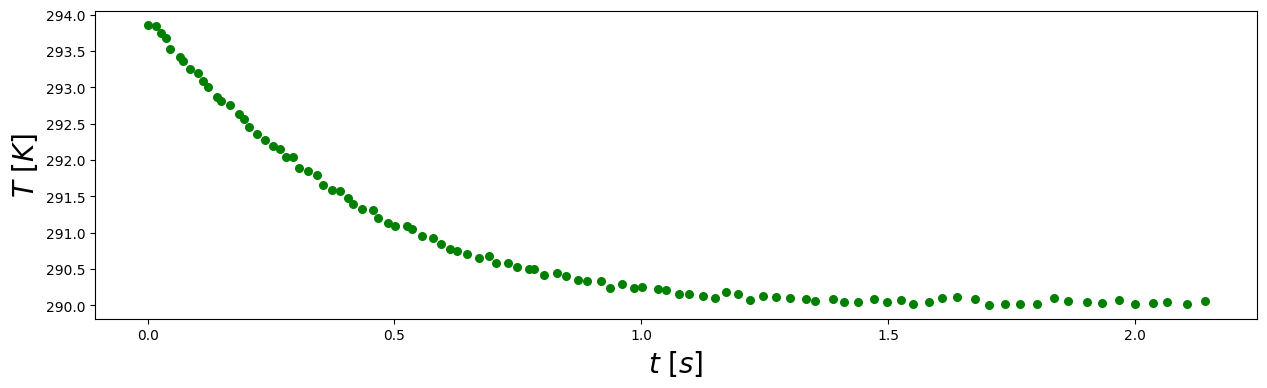

In [7]:
fig = plt.figure(figsize=(15,4))
plt.scatter(dataset_1D[:,0], dataset_1D[:,1], c='g', s=30, zorder=20)
plt.xlabel('$t$ [$s$]', fontsize=20)
plt.ylabel('$T$ [$K$]', fontsize=20)

In [8]:
center_1D = np.min(dataset_1D, axis=0)
scale_1D = np.max(dataset_1D, axis=0) - np.min(dataset_1D, axis=0)

dataset_1D_scaled = (dataset_1D - center_1D) / scale_1D

In [9]:
df = pd.DataFrame(dataset_1D_scaled, columns=['$t$ [$s$]', '$T$ [$K$]'])
df.head(dataset_1D_scaled.shape[0])

,$t$ [$s$],$T$ [$K$]
0,0.000000,1.000000
1,0.008244,0.994773
2,0.012601,0.970488
3,0.016932,0.951851
4,0.021021,0.912388
...,...,...
95,0.933722,0.001639
96,0.950824,0.004618
97,0.964702,0.011058
98,0.983178,0.000801


In [10]:
x_train, x_test, y_train, y_test = train_test_split(dataset_1D_scaled[:,0], dataset_1D_scaled[:,1], test_size=0.3, random_state=random_seed)

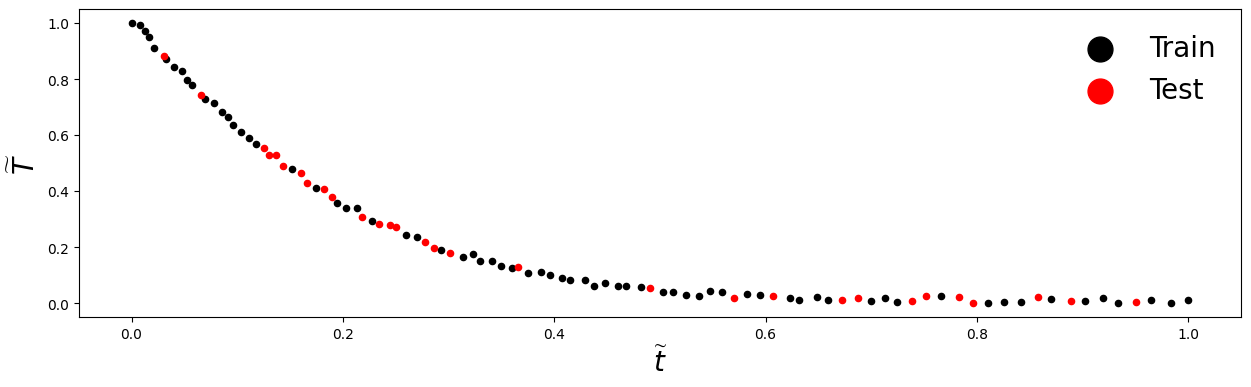

In [11]:
fig = plt.figure(figsize=(15,4))
plt.scatter(x_train, y_train, c='k', s=20, zorder=20, label='Train')
plt.scatter(x_test, y_test, c='r', s=20, zorder=20, label='Test')
plt.xlabel('$\\widetilde{t}$', fontsize=20)
plt.ylabel('$\\widetilde{T}$', fontsize=20)
plt.legend(fontsize=20, frameon=False, markerscale=4);

### Run ANN regression

In [12]:
tf.random.set_seed(random_seed)

model = Sequential([
    Dense(5, input_dim=1, activation='tanh'),
    Dense(4, activation='tanh'),
    Dense(1, activation='linear')
])

model.compile(tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

In [13]:
weights_and_biases = model.get_weights()

In [14]:
weights_and_biases

[array([[ 0.11711836,  0.07933378,  0.8078294 ,  0.10924339, -0.9400451 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.46624982,  0.5242665 ,  0.51175   ,  0.1789164 ],
        [-0.76493335, -0.7045561 ,  0.03444511, -0.21775383],
        [-0.48076212, -0.19799423,  0.5899161 , -0.48517603],
        [-0.27787447,  0.03864998, -0.23239207,  0.42225838],
        [ 0.27147925, -0.04819083, -0.7261043 , -0.2036295 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.52642906],
        [-0.5366415 ],
        [-0.96735185],
        [-0.9308982 ]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
for i in range(0,len(weights_and_biases)):
    if i%2==0: print('Layer ' + str(int(i/2) + 2) + ': ' + '- '*20)
    print(weights_and_biases[i].shape)
    if i%2==1: print()

Layer 2: - - - - - - - - - - - - - - - - - - - - 
(1, 5)
(5,)

Layer 3: - - - - - - - - - - - - - - - - - - - - 
(5, 4)
(4,)

Layer 4: - - - - - - - - - - - - - - - - - - - - 
(4, 1)
(1,)



In [16]:
for i in range(0,len(weights_and_biases)):
    if i%2==0: print('Layer ' + str(int(i/2) + 2) + ': ' + '- '*20)
    if i%2==0: 
        print('\nWeight:')
    else:
        print('Bias:')
    print(weights_and_biases[i])
    print()

Layer 2: - - - - - - - - - - - - - - - - - - - - 

Weight:
[[ 0.11711836  0.07933378  0.8078294   0.10924339 -0.9400451 ]]

Bias:
[0. 0. 0. 0. 0.]

Layer 3: - - - - - - - - - - - - - - - - - - - - 

Weight:
[[-0.46624982  0.5242665   0.51175     0.1789164 ]
 [-0.76493335 -0.7045561   0.03444511 -0.21775383]
 [-0.48076212 -0.19799423  0.5899161  -0.48517603]
 [-0.27787447  0.03864998 -0.23239207  0.42225838]
 [ 0.27147925 -0.04819083 -0.7261043  -0.2036295 ]]

Bias:
[0. 0. 0. 0.]

Layer 4: - - - - - - - - - - - - - - - - - - - - 

Weight:
[[ 0.52642906]
 [-0.5366415 ]
 [-0.96735185]
 [-0.9308982 ]]

Bias:
[0.]



In [17]:
tic = time.perf_counter()

history = model.fit(x_train,
                    y_train,
                    batch_size=50,
                    epochs=2000,
                    validation_data=(x_test, y_test),
                    verbose=0)

toc = time.perf_counter()
print('Time it took: ' + str(int(toc-tic)) + ' seconds.')

Time it took: 53 seconds.


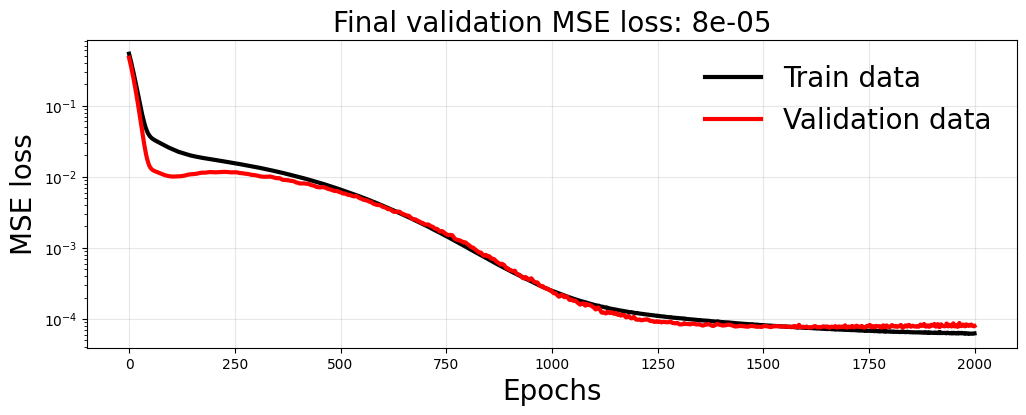

In [18]:
plot_nn_diagnostics(history);

In [19]:
t_ANN = np.linspace(0.0,1,200)

In [20]:
T_ANN = model.predict(t_ANN)

7/7 [==============================] - 0s 920us/step


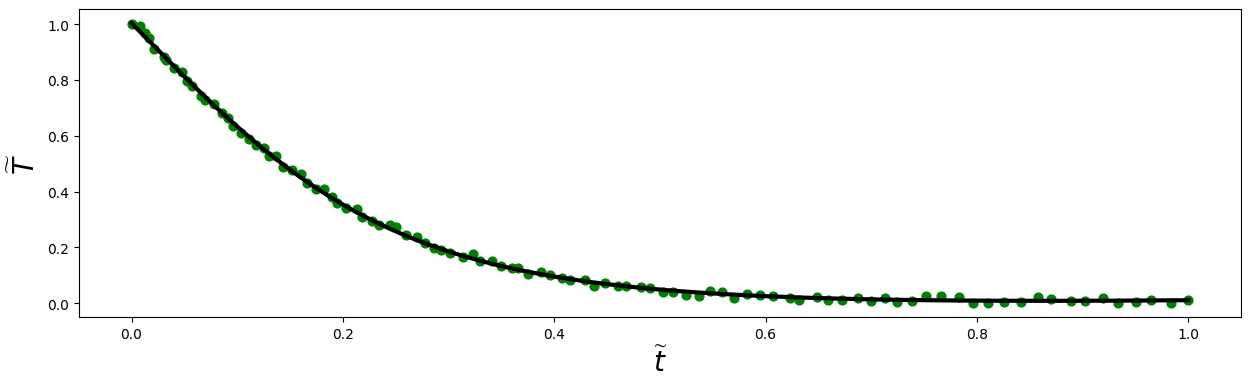

In [21]:
fig = plt.figure(figsize=(15,4))
plt.scatter(dataset_1D_scaled[:,0], dataset_1D_scaled[:,1], c='g', s=40, zorder=20)
plt.xlabel('$\\widetilde{t}$', fontsize=20)
plt.ylabel('$\\widetilde{T}$', fontsize=20)
plt.plot(t_ANN, T_ANN, c='k', zorder=30, lw=3)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


### Manual prediction

In [23]:
weights_and_biases = model.get_weights()

In [24]:
manual_prediction = np.dot(np.tanh((np.dot(np.tanh(np.dot(t_ANN[:,None], weights_and_biases[0]) + weights_and_biases[1]), weights_and_biases[2]) + weights_and_biases[3])), weights_and_biases[4]) + weights_and_biases[5]

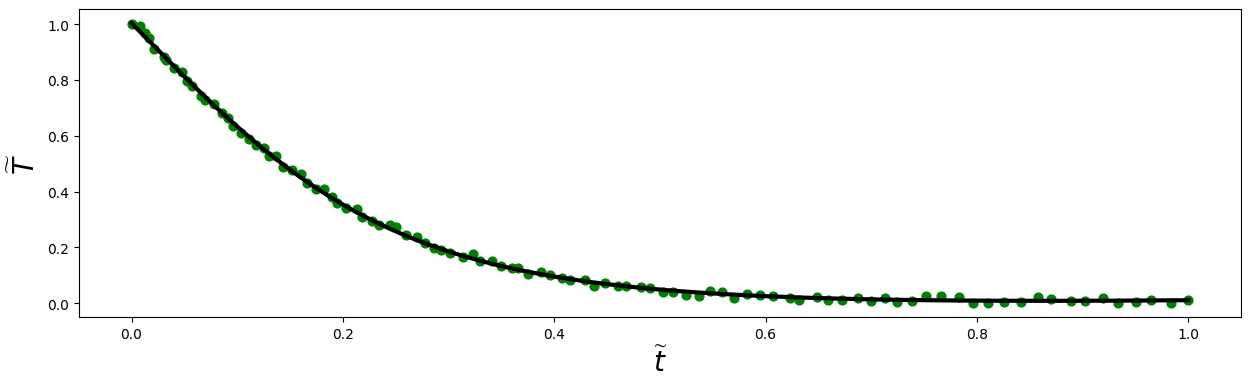

In [25]:
fig = plt.figure(figsize=(15,4))
plt.scatter(dataset_1D_scaled[:,0], dataset_1D_scaled[:,1], c='g', s=40, zorder=20)
plt.xlabel('$\\widetilde{t}$', fontsize=20)
plt.ylabel('$\\widetilde{T}$', fontsize=20)
plt.plot(t_ANN, manual_prediction, c='k', zorder=30, lw=3);

***

## Regression on the 2D training dataset `dataset-2D-leaf-growth.csv`

In [26]:
# n_points = 400
# x_start = 280
# x_stop = 290

# x = np.linspace(x_start,x_stop, n_points) 
# y = np.hstack((np.ones_like(x)*10, np.ones_like(x)*11, np.ones_like(x)*12, np.ones_like(x)*13))

# x = np.hstack((x, x, x, x))
# x = x + np.random.random(n_points*4)/20
# y = y + np.random.random(n_points*4)/20

# z =  -y/20 * (x - 285)**2 + 2*y

# dataset_2D = np.hstack((x[:,None], y[:,None], z[:,None]))

# np.savetxt('dataset-2D-leaf-growth.csv', (dataset_2D), delimiter=',', fmt='%.16e')

In [27]:
dataset_2D = np.genfromtxt('dataset-2D-leaf-growth.csv', delimiter=',')

In [28]:
df = pd.DataFrame(dataset_2D, columns=['$T$ [$K$]', '$H$ [$\%$]', '$\Delta L$ [$mm$]'])
df.head(dataset_2D.shape[0])

,$T$ [$K$],$H$ [$\%$],$\Delta L$ [$mm$]
0,280.033975,10.042944,7.702231
1,280.071066,10.019091,7.867799
2,280.056543,10.016531,7.793980
3,280.098698,10.003938,7.991767
4,280.149624,10.020897,8.254140
...,...,...,...
1595,289.946982,13.046404,10.128820
1596,289.962635,13.012237,10.001367
1597,289.997564,13.049742,9.803194
1598,289.979614,13.044268,9.915887


Text(0, 0.5, '$\\Delta L$ [$mm$]')

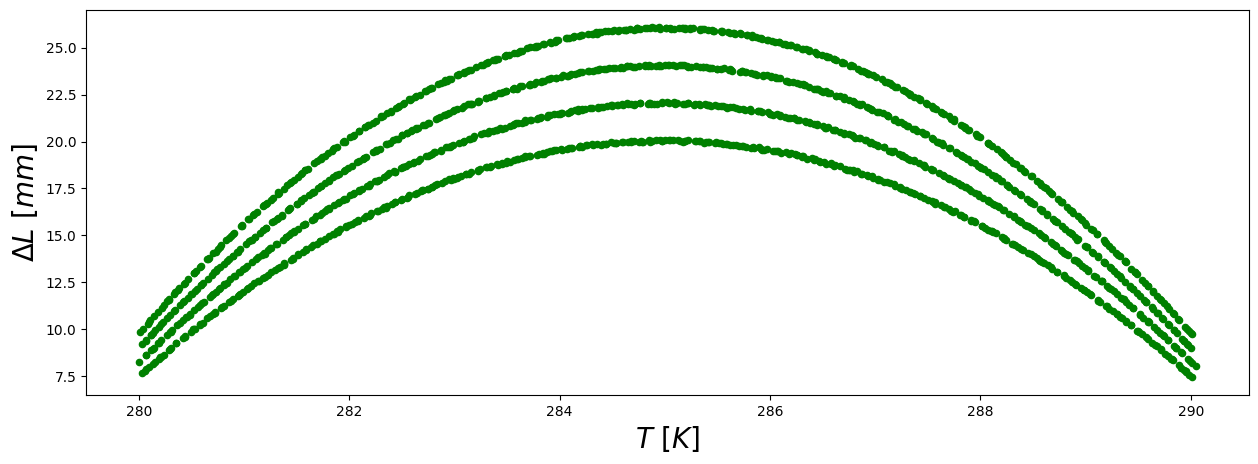

In [29]:
fig = plt.figure(figsize=(15,5))
plt.scatter(dataset_2D[:,0], dataset_2D[:,2], c='g', s=20, zorder=20)
plt.xlabel('$T$ [$K$]', fontsize=20)
plt.ylabel('$\Delta L$ [$mm$]', fontsize=20)

Text(0, 0.5, '$\\Delta L$ [$mm$]')

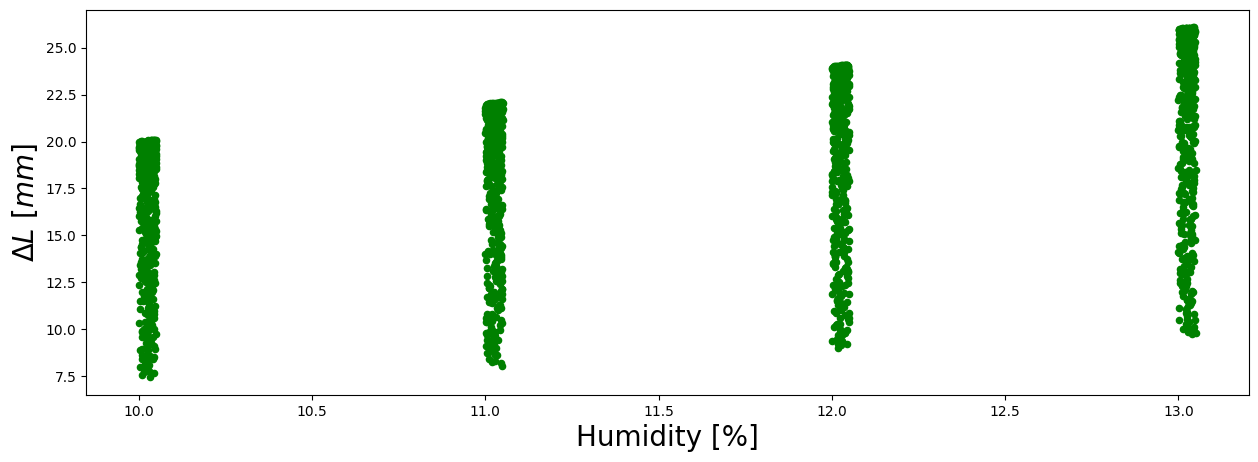

In [30]:
fig = plt.figure(figsize=(15,5))
plt.scatter(dataset_2D[:,1], dataset_2D[:,2], c='g', s=20, zorder=20)
plt.xlabel('Humidity [%]', fontsize=20)
plt.ylabel('$\Delta L$ [$mm$]', fontsize=20)

In [31]:
centers_2D = np.min(dataset_2D, axis=0)
scales_2D = np.max(dataset_2D, axis=0) - np.min(dataset_2D, axis=0)

dataset_2D_scaled = (dataset_2D - centers_2D) / scales_2D

Text(0, 0.5, '$\\widetilde{\\Delta L}$')

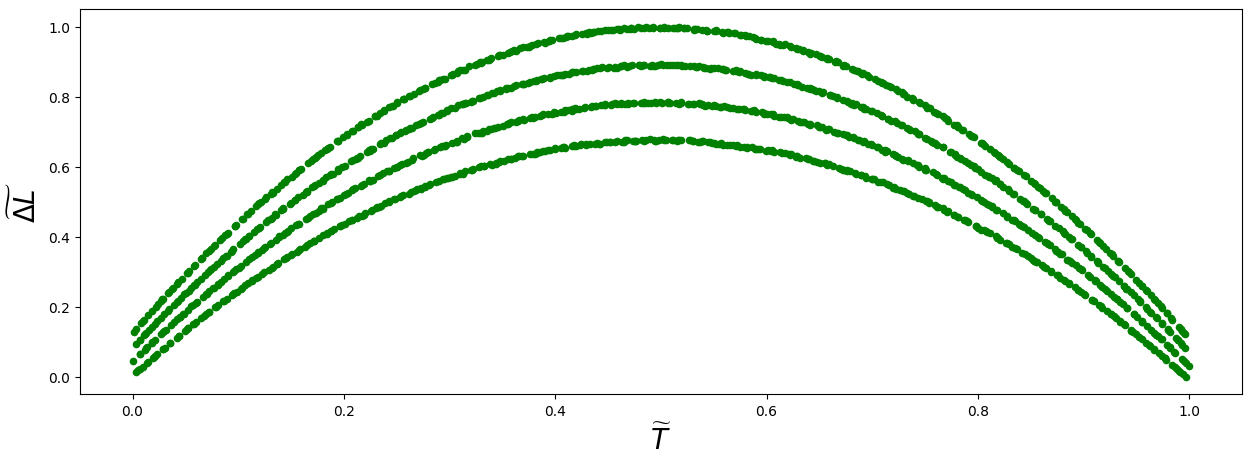

In [32]:
fig = plt.figure(figsize=(15,5))
plt.scatter(dataset_2D_scaled[:,0], dataset_2D_scaled[:,2], c='g', s=20, zorder=20)
plt.xlabel('$\\widetilde{T}$', fontsize=20)
plt.ylabel('$\\widetilde{\Delta L}$', fontsize=20)

***

## Run ANN regression

### Predict based on a single input parameter

In [33]:
x_train, x_test, y_train, y_test = train_test_split(dataset_2D_scaled[:,0], dataset_2D_scaled[:,2], test_size=0.3, random_state=random_seed)

In [34]:
tf.random.set_seed(random_seed)

model = Sequential([
    Dense(5, input_dim=1, activation='tanh'),
    Dense(5, activation='tanh'),
    Dense(1, activation='linear')
])

model.compile(tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

In [35]:
tic = time.perf_counter()

history = model.fit(x_train,
                    y_train,
                    batch_size=200,
                    epochs=1000,
                    validation_data=(x_test,y_test),
                    verbose=0)

toc = time.perf_counter()
print('Time it took: ' + str(int(toc-tic)) + ' seconds.')

Time it took: 41 seconds.


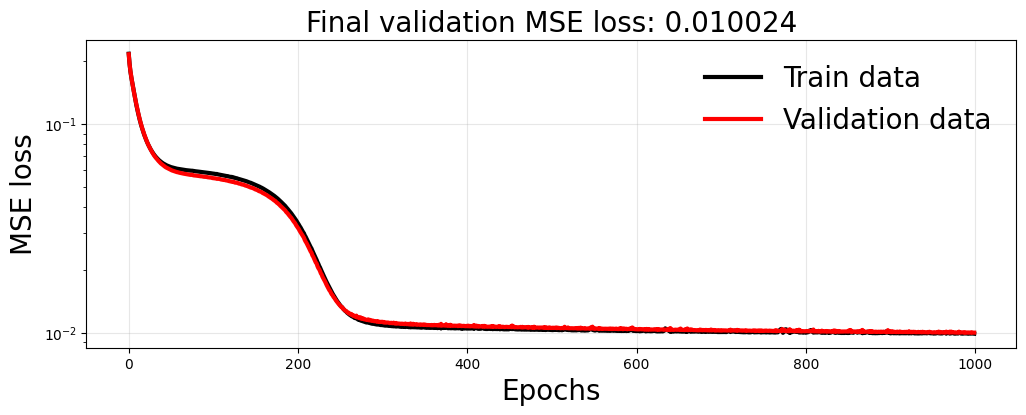

In [36]:
plot_nn_diagnostics(history);

In [37]:
T_ANN = np.linspace(0,1,100)

In [38]:
Delta_L_ANN = model.predict(T_ANN)

4/4 [==============================] - 0s 7ms/step


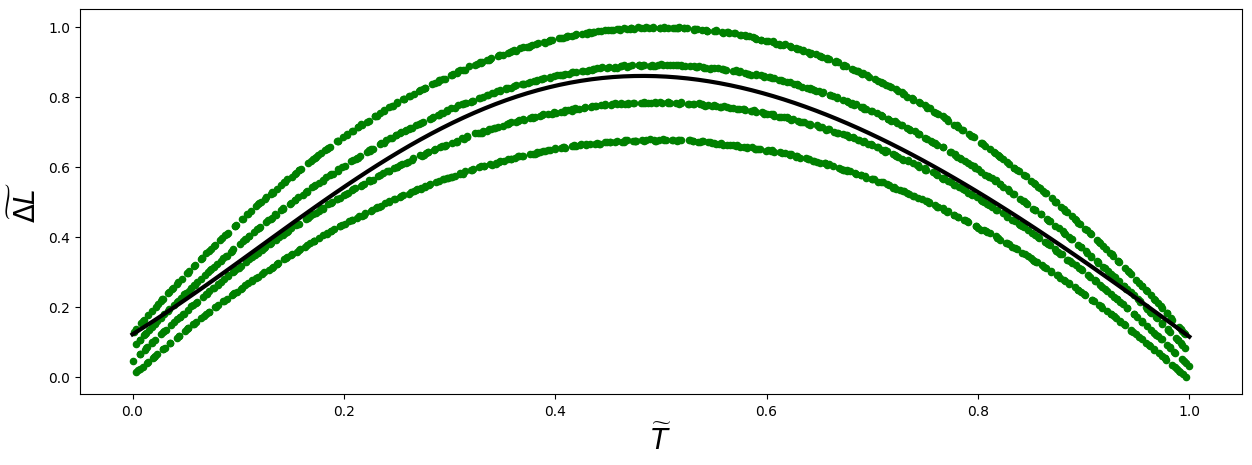

In [39]:
fig = plt.figure(figsize=(15,5))
plt.scatter(dataset_2D_scaled[:,0], dataset_2D_scaled[:,2], c='g', s=20, zorder=20)
plt.xlabel('$\\widetilde{T}$', fontsize=20)
plt.ylabel('$\\widetilde{\Delta L}$', fontsize=20)
plt.plot(T_ANN, Delta_L_ANN, c='k', zorder=30, lw=3);

### Predict based on two input parameters

In [40]:
x_train, x_test, y_train, y_test = train_test_split(dataset_2D_scaled[:,0:2], dataset_2D_scaled[:,2], test_size=0.3, random_state=random_seed)

In [41]:
tf.random.set_seed(random_seed)

model = Sequential([
Dense(5, input_dim=2, activation='tanh'),
Dense(5, activation='tanh'),
Dense(1, activation='linear')])

model.compile(tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

In [42]:
tic = time.perf_counter()

history = model.fit(x_train,
                    y_train,
                    batch_size=200,
                    epochs=2000,
                    validation_data=(x_test,y_test),
                    verbose=0)

toc = time.perf_counter()
print('Time it took: ' + str(int(toc-tic)) + ' seconds.')

Time it took: 80 seconds.


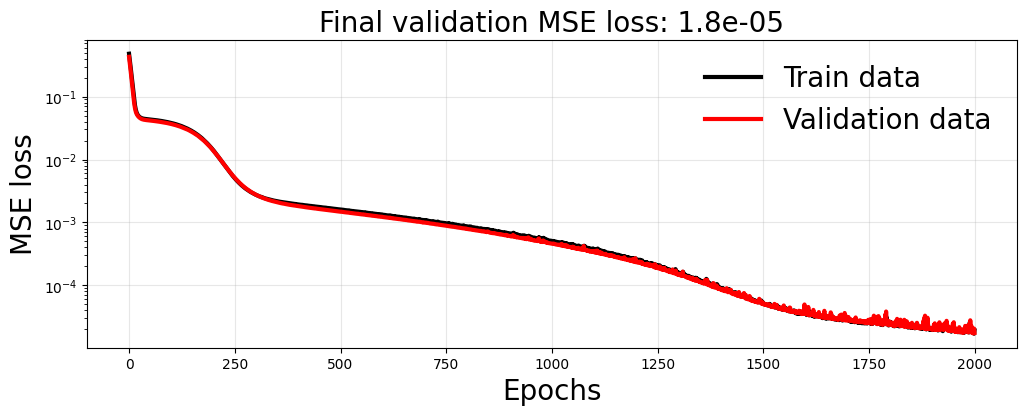

In [43]:
plot_nn_diagnostics(history);

In [44]:
test_humidity = 12
T_ANN = np.linspace(280,290,100)
H_ANN = np.ones_like(T_ANN)*test_humidity

dataset_ANN = np.hstack((T_ANN[:,None],H_ANN[:,None]))
dataset_ANN_scaled = (dataset_ANN - centers_2D[0:2]) / scales_2D[0:2]

In [45]:
Delta_L_ANN = model.predict(dataset_ANN_scaled)

4/4 [==============================] - 0s 2ms/step


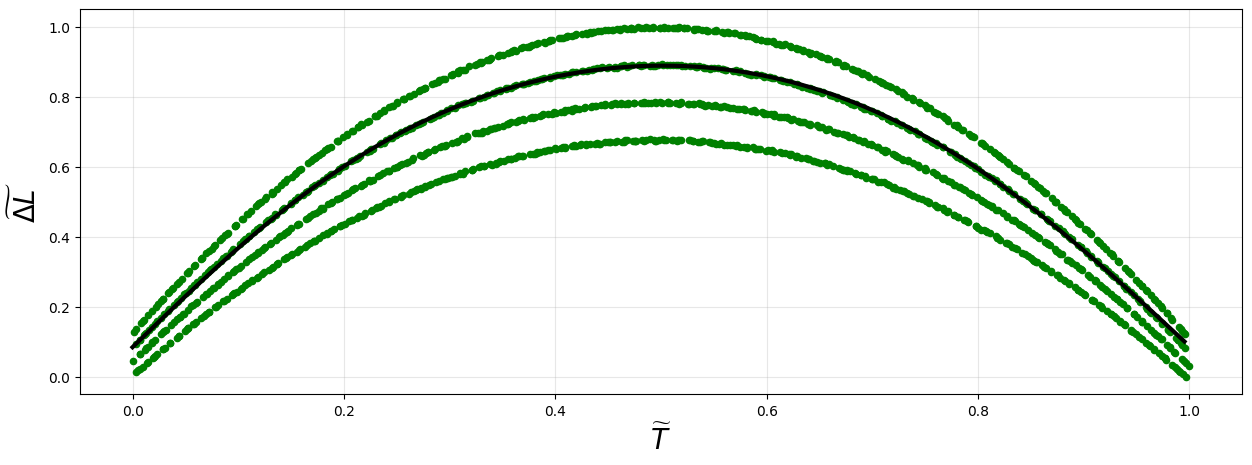

In [46]:
fig = plt.figure(figsize=(15,5))
plt.scatter(dataset_2D_scaled[:,0], dataset_2D_scaled[:,2], c='g', s=20, zorder=20)
plt.xlabel('$\\widetilde{T}$', fontsize=20)
plt.ylabel('$\\widetilde{\Delta L}$', fontsize=20)
plt.grid(alpha=0.3)
plt.plot(dataset_ANN_scaled[:,0], Delta_L_ANN, c='k', zorder=30, lw=3)

***

## Activation functions

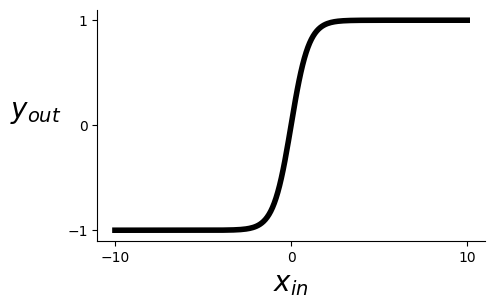

In [47]:
x = np.linspace(-10,10,200)
y_tanh = np.tanh(x)

plt.figure(figsize=(5,3))
plt.plot(x, y_tanh, lw=4, c='k')
plt.xticks([-10,0,10])
plt.yticks([-1,0,1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('$x_{in}$', fontsize=20)
plt.ylabel('$y_{out}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.savefig('tanh.png', dpi=300, bbox_inches='tight')

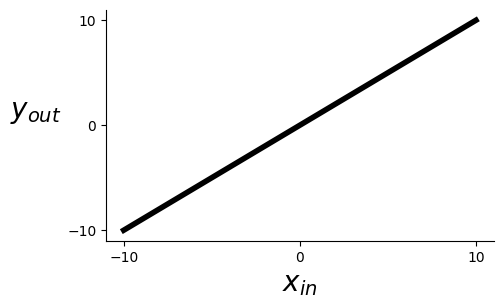

In [48]:
x = np.linspace(-10,10,200)
y_tanh = x

plt.figure(figsize=(5,3))
plt.plot(x, y_tanh, lw=4, c='k')
plt.xticks([-10,0,10])
plt.yticks([-10,0,10])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('$x_{in}$', fontsize=20)
plt.ylabel('$y_{out}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.savefig('linear.png', dpi=300, bbox_inches='tight')

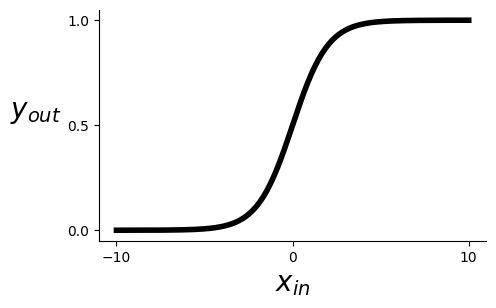

In [49]:
x = np.linspace(-10,10,200)
y_tanh = 1 / (1 + np.exp(-x))

plt.figure(figsize=(5,3))
plt.plot(x, y_tanh, lw=4, c='k')
plt.xticks([-10,0,10])
plt.yticks([0,0.5,1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('$x_{in}$', fontsize=20)
plt.ylabel('$y_{out}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.savefig('sigmoid.png', dpi=300, bbox_inches='tight')

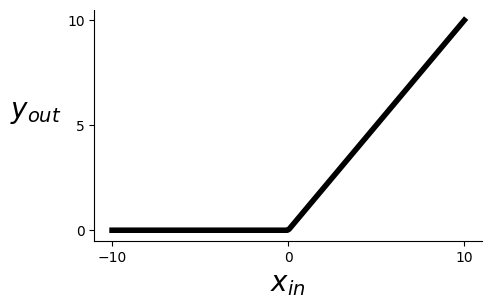

In [50]:
x = np.linspace(-10,10,200)

y_tanh = np.zeros_like(x)

for i in range(0,len(x)):
    if x[i] > 0: y_tanh[i] = x[i]

plt.figure(figsize=(5,3))
plt.plot(x, y_tanh, lw=4, c='k')
plt.xticks([-10,0,10])
plt.yticks([0,5,10])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('$x_{in}$', fontsize=20)
plt.ylabel('$y_{out}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.savefig('ReLU.png', dpi=300, bbox_inches='tight')

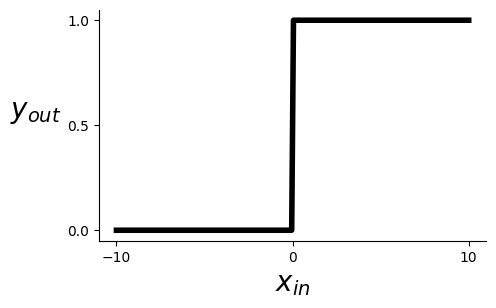

In [51]:
x = np.linspace(-10,10,200)

y_tanh = np.zeros_like(x)

for i in range(0,len(x)):
    if x[i] > 0: y_tanh[i] = 1

plt.figure(figsize=(5,3))
plt.plot(x, y_tanh, lw=4, c='k')
plt.xticks([-10,0,10])
plt.yticks([0,0.5,1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('$x_{in}$', fontsize=20)
plt.ylabel('$y_{out}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.savefig('0-1.png', dpi=300, bbox_inches='tight')

***